# Danny's Pizza — Dataset Scaffold (OscarF Datasets generator)

> Add blockquote



**Created:** 2025-08-22 00:39

This notebook sets up the **small tables** in-notebook and expects the **large order tables** to be loaded from CSV/XLS files.
It strictly follows the schema from class:

- `pizza_names(pizza_id INT, pizza_name TEXT)`
- `pizza_toppings(topping_id INT, topping_name TEXT)`
- `pizza_recipes(pizza_id INT, toppings TEXT)` where `toppings` is a comma-separated list of `topping_id`s
- `runners(runner_id INT, registration_date DATE)`
- `customer_orders(order_id INT, customer_id INT, pizza_id INT, exclusions VARCHAR(4), extras VARCHAR(4), order_date TIMESTAMP)`
- `runner_orders(order_id INT, runner_id INT, pickup_time VARCHAR(19), distance VARCHAR(7), duration VARCHAR(10), cancellation VARCHAR(23))`



In [1]:
import pandas as pd

## Create Small Tables (Dims)

We define a **minimal, realistic** pizza catalog.


In [2]:
# --- pizza_names ---
pizza_names = pd.DataFrame({
    'pizza_id': [1, 2, 3, 4, 5, 6, 7],
    'pizza_name': [
        'Margherita',        # 1
        'Vegetarian',        # 2
        'Meat Lovers',       # 3
        'BBQ Chicken',       # 4
        'Hawaiian',          # 5
        'Pepperoni',         # 6
        'Vegan Veggie'       # 7  <-- vegan option (no cheese by default)
    ]
})
pizza_names.to_csv('pizza_names.csv', index=False)
pizza_names

,pizza_id,pizza_name
0,1,Margherita
1,2,Vegetarian
2,3,Meat Lovers
3,4,BBQ Chicken
4,5,Hawaiian
5,6,Pepperoni
6,7,Vegan Veggie


In [3]:
# --- pizza_toppings ---
# Concise list so students can reason about extras/exclusions clearly
pizza_toppings = pd.DataFrame({
    'topping_id': list(range(1, 16)),
    'topping_name': [
        'Tomato Sauce',  # 1
        'Mozzarella',    # 2
        'Mushroom',      # 3
        'Onion',         # 4
        'Bell Pepper',   # 5
        'Olives',        # 6
        'Pepperoni',     # 7
        'Bacon',         # 8
        'Beef',          # 9
        'Chicken',       # 10
        'Pineapple',     # 11
        'BBQ Sauce',     # 12
        'Jalapeno',      # 13
        'Fresh Basil',   # 14
        'Garlic'         # 15
    ]
})
pizza_toppings.to_csv('pizza_toppings.csv', index=False)
pizza_toppings

,topping_id,topping_name
0,1,Tomato Sauce
1,2,Mozzarella
2,3,Mushroom
3,4,Onion
4,5,Bell Pepper
5,6,Olives
6,7,Pepperoni
7,8,Bacon
8,9,Beef
9,10,Chicken


In [4]:
# --- pizza_recipes ---
# Define base recipes as comma-separated topping_id strings (order does not matter)
recipes_map = {
    1: [1,2,14],               # Margherita: sauce, mozzarella, basil
    2: [1,2,3,4,5,6],          # Vegetarian: sauce, mozzarella, mushroom, onion, bell pepper, olives
    3: [1,2,7,8,9],            # Meat Lovers: sauce, mozzarella, pepperoni, bacon, beef
    4: [1,2,10,12],            # BBQ Chicken: sauce, mozzarella, chicken, bbq sauce
    5: [1,2,11,6],             # Hawaiian: sauce, mozzarella, pineapple, olives
    6: [1,2,7],                # Pepperoni: sauce, mozzarella, pepperoni
    7: [1,3,4,5,6,15]          # Vegan Veggie: sauce, mushroom, onion, bell pepper, olives, garlic (no cheese)
}

pizza_recipes = pd.DataFrame({
    'pizza_id': list(recipes_map.keys()),
    'toppings': [','.join(map(str, v)) for v in recipes_map.values()]
})
pizza_recipes.to_csv('pizza_recipes.csv', index=False)
pizza_recipes

,pizza_id,toppings
0,1,"1,2,14"
1,2,"1,2,3,4,5,6"
2,3,"1,2,7,8,9"
3,4,"1,2,10,12"
4,5,"1,2,11,6"
5,6,"1,2,7"
6,7,"1,3,4,5,6,15"


In [5]:
# --- runners ---

dates = pd.date_range('2021-01-03', periods=15, freq='7D')
runners = pd.DataFrame({
    'runner_id': range(1, 16),
    'registration_date': dates.date
})
runners.to_csv('runners.csv', index=False)
runners

,runner_id,registration_date
0,1,2021-01-03
1,2,2021-01-10
2,3,2021-01-17
3,4,2021-01-24
4,5,2021-01-31
5,6,2021-02-07
6,7,2021-02-14
7,8,2021-02-21
8,9,2021-02-28
9,10,2021-03-07


## Load Orders

This cell loads the orders from CSV first; if not present, it tries XLSX. Adjust file paths if needed.


## Cleaning & Normalization Helpers

- Parse `distance` (to float km) and `duration` (to minutes).
- Normalize `cancellation` labels (lowercase, strip).
- Enforce FK integrity and logical constraints.


In [6]:

import numpy as np

# Base path in Google Drive


# --- Load small dimension tables ---
pizza_names     = pd.read_csv('pizza_names.csv')
pizza_toppings  = pd.read_csv( 'pizza_toppings.csv')
pizza_recipes   = pd.read_csv( 'pizza_recipes.csv')
runners         = pd.read_csv( 'runners.csv')

# --- Load big fa(-
customer_orders = pd.read_csv( 'customer_orders.csv')
runner_orders   = pd.read_csv( 'runner_orders.csv')

print("pizza_names:", pizza_names.shape)
print("pizza_toppings:", pizza_toppings.shape)
print("pizza_recipes:", pizza_recipes.shape)
print("runners:", runners.shape)
print("customer_orders:", customer_orders.shape)
print("runner_orders:", runner_orders.shape)


pizza_names: (7, 2)
pizza_toppings: (15, 2)
pizza_recipes: (7, 2)
runners: (15, 2)
customer_orders: (2101, 6)
runner_orders: (1500, 6)


In [7]:
customer_orders.head()

,order_id,customer_id,pizza_id,exclusions,extras,order_date
0,2481,500,2,NaN,NaN,2025-02-21 16:06:46
1,1897,269,6,NaN,NaN,2025-08-12 08:27:50
2,1842,59,7,NaN,NaN,2024-12-23 20:50:23
3,1869,710,6,NaN,NaN,2025-01-31 09:16:49
4,2384,189,3,NaN,NaN,2024-11-30 17:35:37




```
# This is formatted as code
```


# /* --------------------
#   Case Study Questions
#   --------------------*/
A. Pizza Metrics

    How many pizzas were ordered?
    How many unique customer orders were made?
    How many successful orders were delivered by each runner?
    How many of each type of pizza was delivered?
    How many Vegetarian and Meatlovers were ordered by each customer?
    What was the maximum number of pizzas delivered in a single order?
    For each customer, how many delivered pizzas had at least 1 change and how many had no changes?
    How many pizzas were delivered that had both exclusions and extras?
    What was the total volume of pizzas ordered for each hour of the day?
    What was the volume of orders for each day of the week?

B. Runner and Customer Experience

    How many runners signed up for each 1 week period? (i.e. week starts 2021-01-01)
    What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?
    Is there any relationship between the number of pizzas and how long the order takes to prepare?
    What was the average distance travelled for each customer?
    What was the difference between the longest and shortest delivery times for all orders?
    What was the average speed for each runner for each delivery and do you notice any trend for these values?
    What is the successful delivery percentage for each runner?

🍕 section c — customer & business intelligence

C1. total customer spend
 which customers bring in the most revenue?

use to argue for vip memberships or spend-based rewards.

C2. customer frequency (distinct days of orders)
 who orders regularly vs. one-off customers?

segment into loyal customers vs. occasional customers.

hint at frequency-based discounts (e.g., 5th order free).

C3. first pizza ordered by each customer
 what attracts customers initially?

good to identify entry-point pizzas (the hook item that brings people in).

hint at discounts on first-order pizzas to acquire new customers.

C4. overall best-seller pizza
 which pizza keeps the lights on?

highlight as a flagship product to promote.

use for seasonal bundles (“summer deal with our #1 pizza”).

C5. most popular pizza by customer
 can we personalize offers?

recommend personalized “customer favorites” discounts.

hint toward AI/BI-driven recommender systems.

C6. regulars with ≥30 orders and their go-to pizzas
 who are the heavy hitters and what do they like?

obvious loyalty program candidates.

pitch: “keep them happy with exclusive rewards so they don’t churn.”

C7. customers with very consistent habits (always order the same pizza)
 creatures of habit = stable recurring revenue.

membership idea: “pizza subscription” (weekly plan with their pizza auto-delivered).

C8. the “perfect pair”

great marketing story: “find your pizza soulmate.”

pitch: social media campaign + 2-for-1  perfect pizza couples’ promo.

C9. peak order times
👉 what hours & days matter most?

operational: staff scheduling.

marketing: happy hour discounts in slow periods, premium pricing at peak times.

C10. best candidates for loyalty program
👉 combine spend + frequency + consistency.

identify top 5–10% customers.

suggest tiered memberships: silver/gold/platinum.

seasonal perks: double points in winter when sales slow.

# Entregable

final presentation = a business intelligence pitch deck:

customer segmentation (loyal vs occasional vs perfect pair).

menu insights (flagship pizza, first-order hook, personal favorites).

time insights (peak hours, seasonal discounts).

strategic recommendations:

loyalty program design,

subscription/membership tiers,

seasonal & time-based promos,

“perfect pair” marketing campaign.

In [8]:
import sqlite3

db_path = f"dannys_pizza.sqlite"
conn = sqlite3.connect(db_path)
c = conn.cursor()

# drop existing tables (clean slate)
for t in [
    'pizza_names','pizza_toppings','pizza_recipes',
    'runners','customer_orders','runner_orders'
]:
    c.execute(f"DROP TABLE IF EXISTS {t};")

# create empty tables with the canonical column names
c.execute("""CREATE TABLE pizza_names (
  pizza_id INTEGER,
  pizza_name TEXT
);""")

c.execute("""CREATE TABLE pizza_toppings (
  topping_id INTEGER,
  topping_name TEXT
);""")

c.execute("""CREATE TABLE pizza_recipes (
  pizza_id INTEGER,
  toppings TEXT
);""")

c.execute("""CREATE TABLE runners (
  runner_id INTEGER,
  registration_date TEXT
);""")

# NOTE: keep your current column names exactly as they are in the DataFrame
# If your DF uses 'order_date', keep it; if it's 'order_time', keep that.
# Below uses 'order_date'—change to 'order_time' if that’s your DF.
c.execute("""CREATE TABLE customer_orders (
  order_id INTEGER,
  customer_id INTEGER,
  pizza_id INTEGER,
  exclusions TEXT,
  extras TEXT,
  order_date TEXT
);""")

c.execute("""CREATE TABLE runner_orders (
  order_id INTEGER,
  runner_id INTEGER,
  pickup_time TEXT,
  distance TEXT,
  duration TEXT,
  cancellation TEXT
);""")

conn.commit()

# append DataFrames exactly as-is (no cleaning)
pizza_names.to_sql('pizza_names', conn, if_exists='append', index=False)
pizza_toppings.to_sql('pizza_toppings', conn, if_exists='append', index=False)
pizza_recipes.to_sql('pizza_recipes', conn, if_exists='append', index=False)
runners.to_sql('runners', conn, if_exists='append', index=False)
customer_orders.to_sql('customer_orders', conn, if_exists='append', index=False)
runner_orders.to_sql('runner_orders', conn, if_exists='append', index=False)

conn.commit()
print("SQLite ready at:", db_path)

SQLite ready at: dannys_pizza.sqlite


* Q1. How many pizzas were ordered?

In [9]:
pd.read_sql("""
SELECT COUNT(*) AS total_pizzas
FROM customer_orders;
""", conn)


,total_pizzas
0,2101


In [10]:
pd.read_sql(
    '''SELECT * 
    FROM customer_orders''',conn
)

,order_id,customer_id,pizza_id,exclusions,extras,order_date
0,2481,500,2,None,None,2025-02-21 16:06:46
1,1897,269,6,None,None,2025-08-12 08:27:50
2,1842,59,7,None,None,2024-12-23 20:50:23
3,1869,710,6,None,None,2025-01-31 09:16:49
4,2384,189,3,None,None,2024-11-30 17:35:37
...,...,...,...,...,...,...
2096,2167,564,1,None,None,2025-02-24 17:21:24
2097,1790,559,6,None,None,2025-08-07 15:30:57
2098,1815,30,2,None,None,2025-01-28 20:32:47
2099,1923,159,6,1,None,2024-12-18 06:15:39


* Q2. How many unique customer orders were made?


In [11]:
pd.read_sql(
    ''' SELECT COUNT(DISTINCT order_id) unique_orders FROM customer_orders''',conn
)

,unique_orders
0,1500


In [12]:
pd.read_sql(
    '''SELECT * 
    FROM runner_orders''',conn
)

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1001,10,2025-03-15 13:33:16,1.3km,8 minutes,None
1,1002,15,2025-04-30 17:28:29,5.0km,22 minutes,None
2,1003,15,2025-04-05 20:54:21,4.6km,13 minutes,None
3,1004,15,2024-11-28 09:13:40,1.6 km,8 minutes,None
4,1005,8,2025-06-07 14:54:26,2.1km,12 minutes,None
...,...,...,...,...,...,...
1495,2496,6,2025-03-21 19:35:32,1.5km,10 minutes,None
1496,2497,2,2025-03-07 18:21:14,None,None,None
1497,2498,14,2025-07-26 06:50:48,3.5km,14 minutes,None
1498,2499,11,2025-05-25 20:46:05,None,None,None


* Q3. How many successful orders were delivered by each runner?


In [13]:
pd.read_sql(
    '''SELECT 
             runner_id,
             COUNT(order_id) AS successful_orders
        FROM runner_orders
        WHERE cancellation IS NULL
        GROUP BY 1
    ''', conn
)

,runner_id,successful_orders
0,1,93
1,2,110
2,3,115
3,4,90
4,5,109
5,6,80
6,7,101
7,8,92
8,9,87
9,10,89


* Q4 How many of each type of pizza was delivered?

In [14]:
pd.read_sql(
    '''
SELECT 
    p.pizza_name,
    COUNT(p.pizza_id) AS total_delivered
FROM customer_orders co
JOIN pizza_names p 
    ON co.pizza_id = p.pizza_id
JOIN runner_orders r 
    ON co.order_id = r.order_id 
   AND r.cancellation IS NULL
GROUP BY 1;
    ''',conn
)

,pizza_name,total_delivered
0,BBQ Chicken,271
1,Hawaiian,207
2,Margherita,226
3,Meat Lovers,451
4,Pepperoni,385
5,Vegan Veggie,158
6,Vegetarian,328


* Q5 .How many Vegetarian and Meatlovers were ordered by each customer?


In [15]:
pd.read_sql(
    '''
SELECT
     co.customer_id,
     COUNT(co.pizza_id) AS total_ordered
FROM customer_orders co
JOIN pizza_names pn ON 
co.pizza_id = pn.pizza_id AND pn.pizza_name IN ('Meat Lovers', 'Vegetarian')
GROUP BY 1
ORDER BY 1
''',conn
)

,customer_id,total_ordered
0,1,1
1,2,1
2,3,1
3,5,11
4,10,1
...,...,...
353,790,2
354,791,1
355,793,1
356,796,2


* Q6 .What was the maximum number of pizzas delivered in a single order?


In [16]:
pd.read_sql(
   '''
SELECT 
      MAX(pizza_count) max_count
From(
SELECT 
      order_id,
      COUNT(pizza_id) pizza_count
FROM customer_orders
GROUP BY 1)
''',conn
)

,max_count
0,4


* Q7 .For each customer, how many delivered pizzas had at least 1 change and how many had no changes?


In [17]:
pd.read_sql(
    '''SELECT 
             co.customer_id,
             COUNT(co.pizza_id) AS total_pizzas_change
       FROM customer_orders co
       JOIN runner_orders r ON co.order_id = r.order_id
       AND r.cancellation IS NULL 
       AND co.exclusions > 1
       GROUP BY 1
       ''',conn
)

,customer_id,total_pizzas_change
0,2,1
1,5,5
2,9,1
3,11,1
4,12,1
...,...,...
250,783,2
251,784,1
252,790,1
253,794,1


In [18]:
pd.read_sql(
    '''SELECT 
             co.customer_id,
             COUNT(co.pizza_id) AS total_pizzas_no_change
       FROM customer_orders co
       JOIN runner_orders r USING(order_id) 
       WHERE r.cancellation IS NULL 
       AND co.exclusions IS NULL
       GROUP BY 1''',conn
)

,customer_id,total_pizzas_no_change
0,1,3
1,3,1
2,5,23
3,7,1
4,8,1
...,...,...
475,791,1
476,793,1
477,794,1
478,796,1


* Q8 .How many pizzas were delivered that had both exclusions and extras?

In [19]:
pd.read_sql(
    '''SELECT COUNT(co.pizza_id) AS total_pizza_ee
      FROM customer_orders co
      JOIN runner_orders r 
      USING(order_id) WHERE r.cancellation IS NULL
      AND co.exclusions NOT NULL AND co.extras NOT NULL
      ''',conn
)

,total_pizza_ee
0,192


* Q9 .What was the total volume of pizzas ordered for each hour of the day?


In [20]:
pd.read_sql(
    '''SELECT 
             strftime('%H',order_date) AS hour,
             COUNT(pizza_id) AS total_pizza
       FROM customer_orders
       GROUP BY 1
       ''',conn
)

,hour,total_pizza
0,00,66
1,01,39
2,02,49
3,03,59
4,04,54
5,05,28
6,06,74
7,07,36
8,08,43
9,09,67


* Q10 .What was the volume of orders for each day of the week?

In [21]:
pd.read_sql(
    '''SELECT 
           strftime('%w', order_date) AS day,
           COUNT(order_id) AS total_orders
        FROM customer_orders
        GROUP BY 1

  ''', conn
)

,day,total_orders
0,0,439
1,1,176
2,2,177
3,3,190
4,4,251
5,5,417
6,6,451


* Q11 .How many runners signed up for each 1 week period? (i.e. week starts 2021-01-01)

In [22]:
pd.read_sql(
    '''SELECT 
   strftime('%W', registration_date)  + 1 AS week,
   COUNT(*) AS runner_count
   FROM runners
   GROUP BY 1 
    
    ''',conn
)

,week,runner_count
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


* Q12 .What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?


In [23]:
pd.read_sql(
    '''SELECT
runner_id,
ROUND(AVG(strftime('%M', pickup_time)),2) AS avg_time
FROM runner_orders 
GROUP BY 1
    ''',conn
)

,runner_id,avg_time
0,1,27.58
1,2,29.28
2,3,29.68
3,4,25.85
4,5,30.91
5,6,24.62
6,7,26.66
7,8,27.48
8,9,31.12
9,10,27.43


* Q13 .Is there any relationship between the number of pizzas and how long the order takes to prepare?

In [24]:
pd.read_sql(
    '''SELECT 
    co.order_id,
    COUNT(co.pizza_id) AS count_pizzas,
    CAST(strftime('%M',r.pickup_time) AS INT) - CAST(strftime('%M', co.order_date) AS INT) AS prepare_time
    FROM customer_orders co
    JOIN runner_orders r USING(order_id)
    GROUP BY 1 
    ORDER BY 3 DESC
    LIMIT 30
    ''',conn
)

,order_id,count_pizzas,prepare_time
0,1302,1,25
1,2469,1,24
2,2422,1,24
3,2072,1,24
4,1466,3,24
5,2439,1,23
6,2083,2,23
7,1054,1,23
8,1051,2,23
9,2257,1,22


* Q14 .What was the average distance travelled for each customer?


In [25]:
pd.read_sql('''
SELECT 
    co.customer_id,
    AVG(ro.duration) AS avg_distance
FROM customer_orders co 
JOIN runner_orders ro USING(order_id)
GROUP BY 1
''', conn)

,customer_id,avg_distance
0,1,15.333333
1,2,19.000000
2,3,23.000000
3,4,14.000000
4,5,17.451613
...,...,...
563,791,16.000000
564,793,NaN
565,794,6.000000
566,796,11.666667


* Q15 .What was the difference between the longest and shortest delivery times for all orders?


In [26]:
pd.read_sql('''
SELECT 
    MAX(CAST(duration AS INTEGER)) - MIN(CAST(duration AS INTEGER)) AS diff
FROM runner_orders
WHERE duration IS NOT NULL
AND cancellation IS NULL or cancellation = 'None'
''', conn)

,diff
0,48


* Q16 .What was the average speed for each runner for each delivery and do you notice any trend for these values?


In [27]:
pd.read_sql(
    '''
SELECT 
    order_id,
    runner_id,
    AVG(CAST(distance AS FLOAT) / CAST(duration AS INT)) AS avg_speed
FROM runner_orders
WHERE cancellation IS NULL 
AND distance IS NOT NULL
AND duration IS NOT NULL
GROUP BY 1
ORDER BY 2,1
LIMIT 40
''',conn

)

,order_id,runner_id,avg_speed
0,1044,1,0.226667
1,1063,1,0.157143
2,1076,1,0.191667
3,1114,1,0.282353
4,1150,1,0.229630
5,1159,1,0.416667
6,1160,1,0.216667
7,1183,1,0.156522
8,1191,1,0.177419
9,1192,1,0.207692


* Q17 .What is the successful delivery percentage for each runner?

In [28]:
pd.read_sql('''
WITH delivered AS (
SELECT 
    runner_id,
    COUNT(order_id) AS delivery_count
FROM runner_orders
WHERE cancellation IS NULL
GROUP BY runner_id
), totals AS (
SELECT 
      runner_id,
      COUNT( order_id) AS total_deliveries
FROM runner_orders
GROUP BY runner_id
)
            
SELECT 
     runner_id,
    ROUND(100.0 * d.delivery_count / t.total_deliveries, 2) AS delivery_percentage
FROM delivered d
JOIN totals t USING(runner_id)
ORDER BY 2 DESC
''', conn)

,runner_id,delivery_percentage
0,12,100.00
1,3,99.14
2,6,98.77
3,11,97.96
4,13,97.85
5,14,97.39
6,7,97.12
7,1,96.88
8,4,96.77
9,5,96.46


C1. total customer spend
 which customers bring in the most revenue?

use to argue for vip memberships or spend-based rewards.



In [29]:
pd.read_sql(
'''
SELECT 
        customer_id,
        COUNT(order_id) AS total_orders
FROM customer_orders
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
''', conn
)

,customer_id,total_orders
0,620,58
1,500,54
2,730,53
3,657,52
4,30,52
5,717,51
6,547,49
7,180,49
8,240,47
9,45,45


C2. customer frequency (distinct days of orders)
 who orders regularly vs. one-off customers?

segment into loyal customers vs. occasional customers.

hint at frequency-based discounts (e.g., 5th order free).



In [30]:
pd.read_sql(
    '''
    WITH total_dates AS (
        SELECT
                customer_id,
                COUNT(DISTINCT order_date) total_order_dates
        FROM customer_orders
        GROUP BY customer_id
    )

    SELECT
            customer_id,
            total_order_dates,
            CASE
                WHEN total_order_dates BETWEEN 1 AND 4 THEN "occasional customer"
                ELSE "regular customer"
            END type_customer
    FROM total_dates
    ORDER BY 2 DESC
      ''',conn
)

,customer_id,total_order_dates,type_customer
0,30,36,regular customer
1,500,36,regular customer
2,717,36,regular customer
3,730,35,regular customer
4,547,34,regular customer
...,...,...,...
563,777,1,occasional customer
564,778,1,occasional customer
565,791,1,occasional customer
566,793,1,occasional customer


C3. first pizza ordered by each customer
 what attracts customers initially?

good to identify entry-point pizzas (the hook item that brings people in).

hint at discounts on first-order pizzas to acquire new customers.



In [171]:
pd.read_sql('''
WITH ranks AS (
    SELECT 
        co.customer_id,
        pn.pizza_name,
        co.order_date,
        DENSE_RANK() OVER (PARTITION BY co.customer_id ORDER BY co.order_date) AS rank_date
    FROM customer_orders co
    JOIN pizza_names pn USING(pizza_id)
), first_orders AS (
    SELECT 
        * 
    FROM ranks
    WHERE rank_date = 1
)
            
SELECT
      pizza_name,
      COUNT(DISTINCT customer_id) total_customer_count
FROM first_orders
GROUP BY 1 
ORDER BY 2 DESC
''',conn)

,pizza_name,total_customer_count
0,Meat Lovers,172
1,Pepperoni,131
2,Vegetarian,119
3,Margherita,96
4,BBQ Chicken,86
5,Hawaiian,82
6,Vegan Veggie,51


C5. most popular pizza by customer
 can we personalize offers?

recommend personalized “customer favorites” discounts.

hint toward AI/BI-driven recommender systems.



In [31]:
pd.read_sql(

    '''
    WITH pizza_count AS (
        SELECT 
                co.customer_id,
                p.pizza_name,
                COUNT(*) pizza_per_customer
        FROM customer_orders co
        JOIN pizza_names p USING(pizza_id)
        GROUP BY 1,2
    ), pizza_rank AS (
        SELECT 
             *,
             DENSE_RANK() OVER (PARTITION BY customer_id ORDER BY pizza_per_customer DESC) AS rn
        FROM pizza_count 
    )

    SELECT 
          customer_id,
          pizza_name
    FROM pizza_rank
    WHERE rn = 1
    
    ''',conn
)

,customer_id,pizza_name
0,1,BBQ Chicken
1,1,Meat Lovers
2,1,Pepperoni
3,2,Margherita
4,2,Meat Lovers
...,...,...
893,791,Vegetarian
894,793,Meat Lovers
895,794,Pepperoni
896,796,Vegetarian



C6. regulars with ≥30 orders and their go-to pizzas
 who are the heavy hitters and what do they like?

obvious loyalty program candidates.

pitch: “keep them happy with exclusive rewards so they don’t churn.”



In [32]:
pd.read_sql(

    '''
    WITH regulars AS (
        SELECT 
                customer_id,
                COUNT(order_id) AS total_orders
        FROM customer_orders
        GROUP BY 1 
        HAVING total_orders >= 30
    ), pizza_rank AS (
        SELECT 
             co.customer_id,
                p.pizza_name,
                DENSE_RANK() OVER (PARTITION BY co.customer_id ORDER BY COUNT(*) DESC) AS rn,
                COUNT(*) pizza_per_customer
        FROM customer_orders co
        JOIN pizza_names p USING(pizza_id)
        WHERE co.customer_id IN (
            SELECT 
                  customer_id
            FROM regulars
        )
        GROUP BY 1,2 
    )

    SELECT 
         customer_id,
         pizza_name
    FROM pizza_rank
    WHERE rn = 1
    
    ''',conn
)

,customer_id,pizza_name
0,5,Meat Lovers
1,5,BBQ Chicken
2,30,Pepperoni
3,45,Pepperoni
4,180,Meat Lovers
5,228,Vegetarian
6,240,Pepperoni
7,400,Pepperoni
8,463,Vegetarian
9,500,Meat Lovers



C7. customers with very consistent habits (always order the same pizza)
 creatures of habit = stable recurring revenue.

membership idea: “pizza subscription” (weekly plan with their pizza auto-delivered).



In [33]:
pd.read_sql(
'''SELECT 
        customer_id,
        COUNT(DISTINCT pizza_id) AS count_pizzas 
   FROM customer_orders
   GROUP BY 1
   HAVING count_pizzas = 1
''',conn

)

,customer_id,count_pizzas
0,4,1
1,7,1
2,8,1
3,10,1
4,11,1
...,...,...
225,778,1
226,791,1
227,793,1
228,794,1



C8. the “perfect pair”

great marketing story: “find your pizza soulmate.”

pitch: social media campaign + 2-for-1  perfect pizza couples’ promo.



In [34]:
pd.read_sql(
    '''
    WITH pizza_order AS (
        SELECT
                order_id,
                COUNT(pizza_id) AS pizza_count
        FROM customer_orders
        GROUP BY 1
        HAVING pizza_count > 1
    ), items AS (                         
        SELECT DISTINCT
            co.order_id,
            co.pizza_id
        FROM customer_orders co
        WHERE co.order_id IN (SELECT order_id FROM pizza_order)
    ), pairs AS (                          
        SELECT
            a.pizza_id AS pizza_a,
            b.pizza_id AS pizza_b,
            COUNT(*)   AS pair_orders
        FROM items a
        JOIN items b
            ON a.order_id = b.order_id
        AND a.pizza_id < b.pizza_id      
        GROUP BY a.pizza_id, b.pizza_id
    )
    SELECT
          pa.pizza_name AS pizza_a,
          pb.pizza_name AS pizza_b,
          pair_orders
    FROM pairs
    JOIN pizza_names pa ON pa.pizza_id = pairs.pizza_a
    JOIN pizza_names pb ON pb.pizza_id = pairs.pizza_b
    ORDER BY pair_orders DESC, pizza_a, pizza_b;
   
    ''',conn
)

,pizza_a,pizza_b,pair_orders
0,Meat Lovers,Pepperoni,62
1,Margherita,Meat Lovers,46
2,Vegetarian,Meat Lovers,42
3,Meat Lovers,BBQ Chicken,40
4,Vegetarian,Pepperoni,40
5,Vegetarian,BBQ Chicken,36
6,Margherita,Pepperoni,33
7,Vegetarian,Hawaiian,31
8,BBQ Chicken,Pepperoni,30
9,Hawaiian,Pepperoni,27



C9. peak order times
👉 what hours & days matter most?

operational: staff scheduling.

marketing: happy hour discounts in slow periods, premium pricing at peak times.



In [35]:
pd.read_sql(
    '''
    SELECT
          strftime('%d', order_date) AS day_order,
          strftime('%H', order_date) AS hour_order,
          COUNT(order_id) AS count_orders
    FROM customer_orders
    GROUP BY 1,2
    ORDER BY 3 DESC
    ''',conn
)

,day_order,hour_order,count_orders
0,02,19,24
1,07,18,21
2,09,18,19
3,23,19,16
4,25,20,16
...,...,...,...
544,31,13,1
545,31,19,1
546,31,20,1
547,31,21,1


C10. best candidates for loyalty program
👉 combine spend + frequency + consistency.

identify top 5–10% customers.

suggest tiered memberships: silver/gold/platinum.

seasonal perks: double points in winter when sales slow.

In [26]:
##pd.read_sql("YOUR QUERY HERE", conn)  # TODO


In [36]:
pd.read_sql("""
SELECT runner_id,
       COUNT(runner_id) AS order_count
FROM runner_orders
WHERE distance IS NOT NULL
  AND TRIM(distance) <> ''
  AND cancellation = ''
GROUP BY runner_id
ORDER BY order_count DESC;
""", conn)


,runner_id,order_count


In [37]:
pd.read_sql("""
SELECT DISTINCT cancellation
FROM runner_orders
""", conn)

,cancellation
0,None
1,address issue
2,custmer_no_sho
3,runner sick
4,customer no show
5,order late
6,restaurant_cancelled
7,runner_unavailable


Notice how our query returned empty results? That is a clue something is off in our filter. We wrote
WHERE distance IS NOT NULL
  AND cancellation = ''''

  but in this dataset, the cancellation column does not only use a blank string to mean no cancellation. Sometimes it has the literal word 'null', sometimes it is NULL (the SQL null value), sometimes different casing (Null, NULL). Because of that, our =  condition excluded almost everything.

In [38]:
pd.read_sql("""
SELECT DISTINCT TRIM(cancellation) AS cancellation_value,
       COUNT(*) AS n
FROM runner_orders
GROUP BY 1
ORDER BY n DESC;
""", conn)


,cancellation_value,n
0,None,1450
1,address issue,13
2,customer no show,9
3,runner sick,7
4,order late,7
5,custmer_no_sho,7
6,runner_unavailable,5
7,restaurant_cancelled,2


In [39]:
# 3a) Successful orders delivered by each runner (ignore distance presence)
pd.read_sql("""
SELECT runner_id,
       COUNT(*) AS order_count
FROM runner_orders
WHERE COALESCE(TRIM(LOWER(cancellation)),'') IN ('', 'null')
GROUP BY runner_id
ORDER BY order_count DESC;
""", conn)


,runner_id,order_count
0,3,115
1,14,112
2,2,110
3,5,109
4,7,101
5,12,96
6,11,96
7,1,93
8,8,92
9,13,91


# 🍕 Customer & Business Intelligence Questions

## C1. Total Customer Spend
**What is the total amount each customer spent at pizza runner?**

*(Hint: use pizza prices from pizza_names and sum across delivered pizzas)*

## C2. Customer Order Frequency
**How many different days has each customer placed an order?**

*(Hint: count distinct dates from order_time / order_date)*

## C3. First Pizza Ordered
**What was the first pizza ordered by each customer?**

*(Hint: find the earliest order_time per customer)*

## C4. Most Popular Pizza Overall
**What is the most purchased pizza overall and how many times was it ordered?**

## C5. Customer's Favorite Pizza
**Which pizza is the most popular for each customer?**

*(Hint: group by customer_id + pizza_id, take the max count)*

## C6. Regular Customer Preferences
**Among the regular customers (≥30 orders), which pizzas do they mostly stick to?**

*(Hint: helps suggest loyalty-program discounts)*

## C7. Consistent Order Habits
**Which customers have very consistent order habits (always order the same pizza)?**

*(Hint: look for customers whose COUNT(DISTINCT pizza_id)=1)*

## C8. The "Perfect Pair"
**Can you find the "perfect pair" — two customers who often order the same pizza at the same time?**

*(Hint: think customers 30 and 543 😉)*

## C9. Peak Order Times
**What are the peak order times for the restaurant?**

*(Hint: group by day-of-week and hour-of-day)*

## 

In [41]:
# =============================================================================
# INICIALIZACIÓN DE DATOS PARA MACHINE LEARNING
# =============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Cargar datos
print("Cargando datos...")
customer_orders = pd.read_csv('customer_orders.csv')
pizza_names = pd.read_csv('pizza_names.csv')
pizza_recipes = pd.read_csv('pizza_recipes.csv')
pizza_toppings = pd.read_csv('pizza_toppings.csv')
runners = pd.read_csv('runners.csv')
runner_orders = pd.read_csv('runner_orders.csv')

# Limpiar y preparar datos base
print("Limpiando datos...")

# Convertir fechas
customer_orders['order_date'] = pd.to_datetime(customer_orders['order_date'])
runner_orders['pickup_time'] = pd.to_datetime(runner_orders['pickup_time'])

# Limpiar cancellation (convertir a binario: 0=entregado, 1=cancelado)
runner_orders['is_cancelled'] = runner_orders['cancellation'].fillna('').apply(
    lambda x: 1 if x.strip().lower() not in ['', 'null', 'none'] else 0
)

# Limpiar distance y duration
runner_orders['distance_km'] = runner_orders['distance'].str.replace('km', '').str.strip().astype(float)
runner_orders['duration_min'] = runner_orders['duration'].str.replace('minutes', '').str.strip().astype(float)

# Crear dataset principal combinado
print("Combinando datasets...")
main_data = customer_orders.merge(pizza_names, on='pizza_id', how='left')
main_data = main_data.merge(runner_orders[['order_id', 'is_cancelled', 'distance_km', 'duration_min']], 
                           on='order_id', how='left')

# Filtrar solo pedidos entregados para análisis
delivered_orders = main_data[main_data['is_cancelled'] == 0].copy()

print(f"Datos cargados: {len(main_data)} pedidos totales, {len(delivered_orders)} entregados")
print(f"Rango de fechas: {delivered_orders['order_date'].min()} a {delivered_orders['order_date'].max()}")

Cargando datos...
Limpiando datos...
Combinando datasets...
Datos cargados: 2101 pedidos totales, 2026 entregados
Rango de fechas: 2024-11-01 04:07:33 a 2025-08-14 20:52:11


## Modelo 1: Logistic Regression - Segmentación de Clientes 

### Preparación de Features para Segmentación

In [42]:
# =============================================================================
# MODELO 1: LOGISTIC REGRESSION - SEGMENTACIÓN DE CLIENTES
# =============================================================================

print("MODELO 1: Segmentación de Clientes (Leales vs Ocasionales)")

# Crear features para segmentación
customer_features = delivered_orders.groupby('customer_id').agg({
    'order_id': 'count',  # total_orders
    'order_date': ['min', 'max'],  # first_order, last_order
    'pizza_id': 'nunique',  # pizza_variety
    'exclusions': lambda x: (x != '').sum(),  # orders_with_exclusions
    'extras': lambda x: (x != '').sum()  # orders_with_extras
}).reset_index()

# Aplanar columnas
customer_features.columns = ['customer_id', 'total_orders', 'first_order', 'last_order', 
                           'pizza_variety', 'orders_with_exclusions', 'orders_with_extras']

print(f"Features creadas para {len(customer_features)} clientes")
print(customer_features.head())

MODELO 1: Segmentación de Clientes (Leales vs Ocasionales)
Features creadas para 557 clientes
   customer_id  total_orders         first_order          last_order  \
0            1             3 2025-02-16 16:20:47 2025-05-12 22:40:43   
1            2             2 2025-06-15 12:46:53 2025-06-15 12:46:53   
2            3             1 2024-12-21 17:48:52 2024-12-21 17:48:52   
3            4             1 2025-04-26 20:02:55 2025-04-26 20:02:55   
4            5            31 2024-11-10 14:38:23 2025-07-30 17:46:02   

   pizza_variety  orders_with_exclusions  orders_with_extras  
0              3                       3                   3  
1              2                       2                   2  
2              1                       1                   1  
3              1                       1                   1  
4              7                      31                  31  


### Cálculo de Métricas de Cliente

In [43]:
# Calcular días de vida del cliente
customer_features['customer_lifetime_days'] = (
    customer_features['last_order'] - customer_features['first_order']
).dt.days

# Calcular frecuencia promedio (días entre pedidos)
customer_features['avg_days_between_orders'] = (
    customer_features['customer_lifetime_days'] / customer_features['total_orders']
).fillna(0)

# Definir cliente leal (≥10 pedidos Y ≤30 días promedio entre pedidos)
customer_features['is_loyal'] = (
    (customer_features['total_orders'] >= 10) & 
    (customer_features['avg_days_between_orders'] <= 30)
).astype(int)

print("Métricas calculadas:")
print(customer_features[['customer_id', 'total_orders', 'customer_lifetime_days', 
                        'avg_days_between_orders', 'is_loyal']].head(10))

Métricas calculadas:
   customer_id  total_orders  customer_lifetime_days  avg_days_between_orders  \
0            1             3                      85                28.333333   
1            2             2                       0                 0.000000   
2            3             1                       0                 0.000000   
3            4             1                       0                 0.000000   
4            5            31                     262                 8.451613   
5            7             1                       0                 0.000000   
6            8             1                       0                 0.000000   
7            9             2                       0                 0.000000   
8           10             1                       0                 0.000000   
9           11             1                       0                 0.000000   

   is_loyal  
0         0  
1         0  
2         0  
3         0  
4         1  
5  

### Análisis Exploratorio y Gráficas

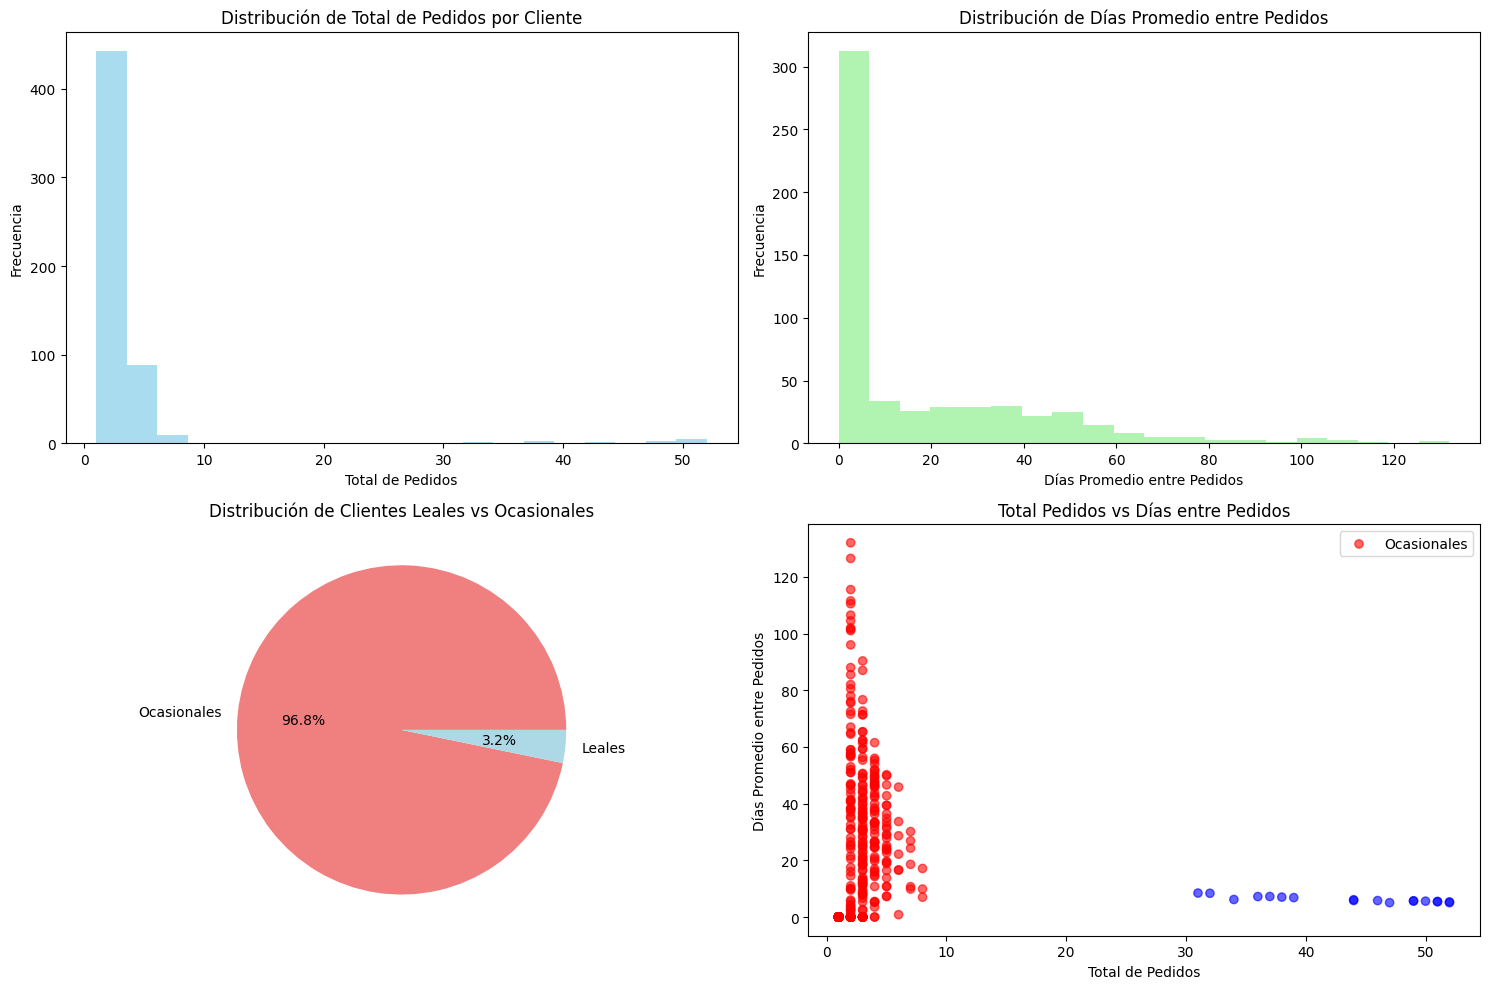

Estadísticas de segmentación:
Clientes leales: 18
Clientes ocasionales: 539
Porcentaje de clientes leales: 3.2%


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficas
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfica 1: Distribución de total de pedidos
axes[0,0].hist(customer_features['total_orders'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribución de Total de Pedidos por Cliente')
axes[0,0].set_xlabel('Total de Pedidos')
axes[0,0].set_ylabel('Frecuencia')

# Gráfica 2: Distribución de días entre pedidos
axes[0,1].hist(customer_features['avg_days_between_orders'], bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribución de Días Promedio entre Pedidos')
axes[0,1].set_xlabel('Días Promedio entre Pedidos')
axes[0,1].set_ylabel('Frecuencia')

# Gráfica 3: Clientes leales vs ocasionales
loyal_counts = customer_features['is_loyal'].value_counts()
axes[1,0].pie(loyal_counts.values, labels=['Ocasionales', 'Leales'], autopct='%1.1f%%', 
              colors=['lightcoral', 'lightblue'])
axes[1,0].set_title('Distribución de Clientes Leales vs Ocasionales')

# Gráfica 4: Scatter plot: Total pedidos vs Días entre pedidos
colors = ['red' if x == 0 else 'blue' for x in customer_features['is_loyal']]
axes[1,1].scatter(customer_features['total_orders'], customer_features['avg_days_between_orders'], 
                  c=colors, alpha=0.6)
axes[1,1].set_title('Total Pedidos vs Días entre Pedidos')
axes[1,1].set_xlabel('Total de Pedidos')
axes[1,1].set_ylabel('Días Promedio entre Pedidos')
axes[1,1].legend(['Ocasionales', 'Leales'])

plt.tight_layout()
plt.show()

print(f"Estadísticas de segmentación:")
print(f"Clientes leales: {customer_features['is_loyal'].sum()}")
print(f"Clientes ocasionales: {(customer_features['is_loyal'] == 0).sum()}")
print(f"Porcentaje de clientes leales: {customer_features['is_loyal'].mean()*100:.1f}%")

### Preparación de Datos para el Modelo

In [45]:
# Features para el modelo
X = customer_features[['total_orders', 'pizza_variety', 'orders_with_exclusions', 
                      'orders_with_extras', 'avg_days_between_orders']]
y = customer_features['is_loyal']

print("Features seleccionadas:")
print(X.columns.tolist())
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")

Features seleccionadas:
['total_orders', 'pizza_variety', 'orders_with_exclusions', 'orders_with_extras', 'avg_days_between_orders']
Shape de X: (557, 5)
Shape de y: (557,)
Datos de entrenamiento: 445 muestras
Datos de prueba: 112 muestras


###  Escalado y Entrenamiento del Mode

In [46]:
# Escalar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

print("Modelo Logistic Regression entrenado exitosamente")

Modelo Logistic Regression entrenado exitosamente


### Evaluación y Predicciones

In [47]:
# Predicciones
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Clientes leales predichos: {y_pred.sum()}/{len(y_pred)}")
print(f"Distribución real: {y.value_counts().to_dict()}")

# Mostrar coeficientes
feature_names = ['total_orders', 'pizza_variety', 'orders_with_exclusions', 
                'orders_with_extras', 'avg_days_between_orders']
coefficients = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nCoeficientes más importantes:")
print(coefficients)

Accuracy: 1.000
Clientes leales predichos: 1/112
Distribución real: {0: 539, 1: 18}

Coeficientes más importantes:
                   feature  coefficient
0             total_orders     0.788324
2   orders_with_exclusions     0.788324
3       orders_with_extras     0.788324
1            pizza_variety     0.596387
4  avg_days_between_orders    -0.119452


###  Gráficas de Evaluación del Modelo

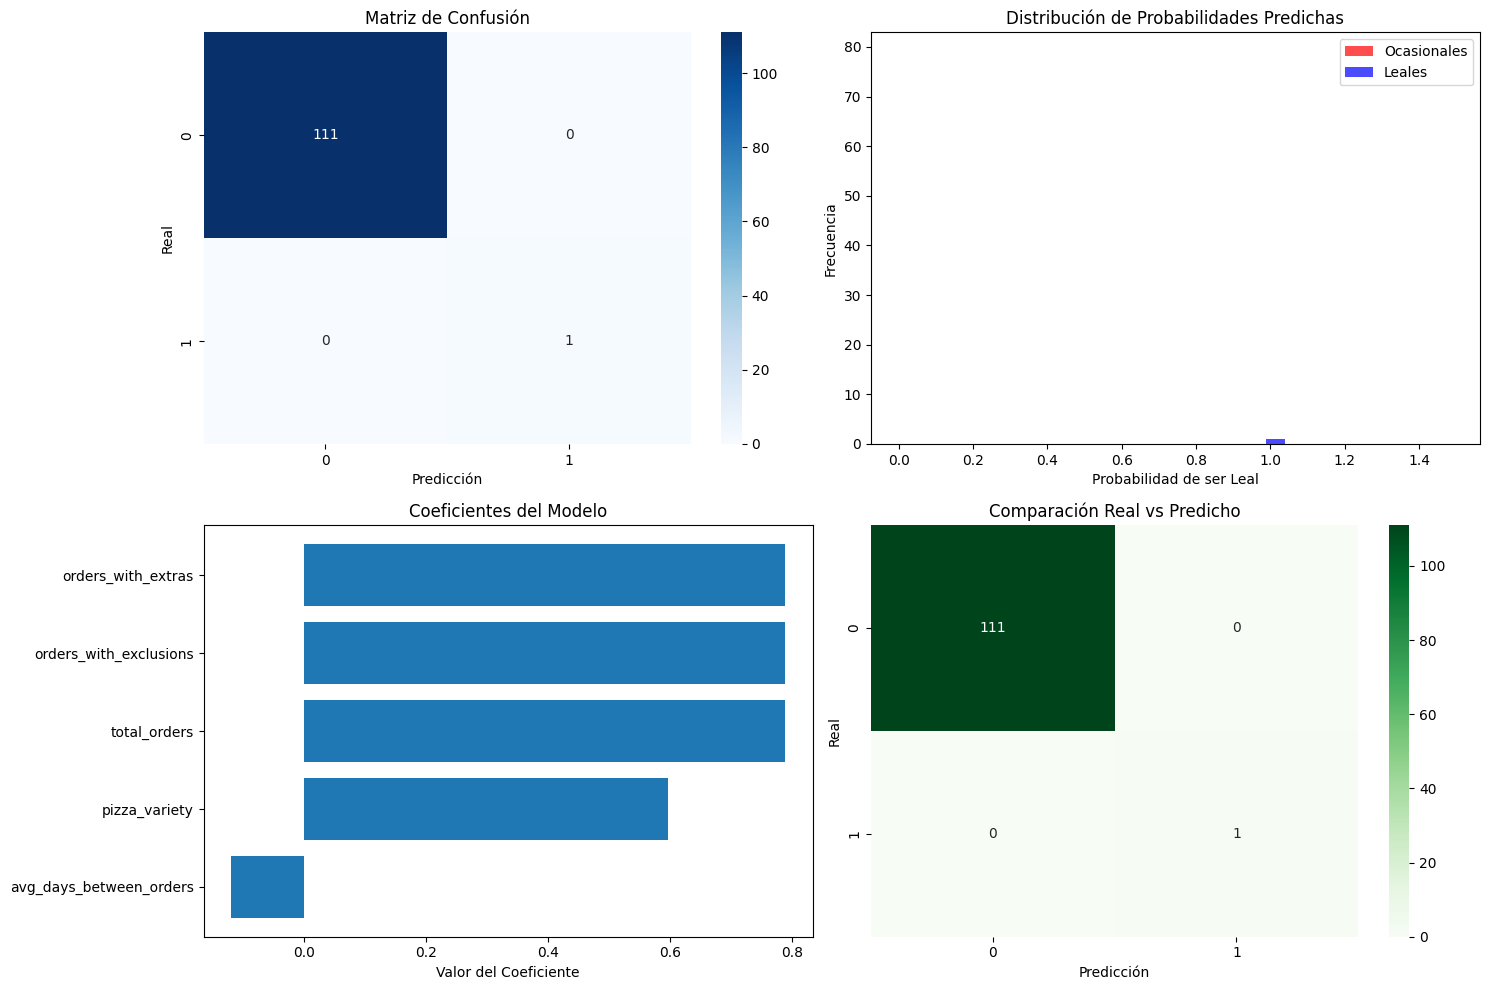

In [48]:
# Gráficas de evaluación
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfica 1: Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Matriz de Confusión')
axes[0,0].set_xlabel('Predicción')
axes[0,0].set_ylabel('Real')

# Gráfica 2: Distribución de probabilidades
axes[0,1].hist(y_pred_proba[y_test == 0], bins=20, alpha=0.7, label='Ocasionales', color='red')
axes[0,1].hist(y_pred_proba[y_test == 1], bins=20, alpha=0.7, label='Leales', color='blue')
axes[0,1].set_title('Distribución de Probabilidades Predichas')
axes[0,1].set_xlabel('Probabilidad de ser Leal')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# Gráfica 3: Importancia de features
coefficients_abs = coefficients.copy()
coefficients_abs['abs_coefficient'] = abs(coefficients_abs['coefficient'])
coefficients_abs = coefficients_abs.sort_values('abs_coefficient', ascending=True)
axes[1,0].barh(coefficients_abs['feature'], coefficients_abs['coefficient'])
axes[1,0].set_title('Coeficientes del Modelo')
axes[1,0].set_xlabel('Valor del Coeficiente')

# Gráfica 4: Comparación real vs predicho
comparison = pd.DataFrame({
    'Real': y_test.values,
    'Predicho': y_pred
})
comparison_counts = comparison.groupby(['Real', 'Predicho']).size().unstack(fill_value=0)
sns.heatmap(comparison_counts, annot=True, fmt='d', cmap='Greens', ax=axes[1,1])
axes[1,1].set_title('Comparación Real vs Predicho')
axes[1,1].set_xlabel('Predicción')
axes[1,1].set_ylabel('Real')

plt.tight_layout()
plt.show()

###  Función de Predicción y Casos de Uso

In [49]:
# Función para predecir si un cliente es leal
def predict_customer_loyalty(customer_id):
    if customer_id not in customer_features['customer_id'].values:
        return "Cliente no encontrado"
    
    customer_data = customer_features[customer_features['customer_id'] == customer_id]
    features = customer_data[['total_orders', 'pizza_variety', 'orders_with_exclusions', 
                             'orders_with_extras', 'avg_days_between_orders']]
    
    features_scaled = scaler.transform(features)
    prediction = lr_model.predict(features_scaled)[0]
    probability = lr_model.predict_proba(features_scaled)[0][1]
    
    return {
        'customer_id': customer_id,
        'is_loyal': bool(prediction),
        'loyalty_probability': probability,
        'total_orders': customer_data['total_orders'].iloc[0],
        'avg_days_between_orders': customer_data['avg_days_between_orders'].iloc[0]
    }

# Ejemplo de predicción
sample_customer = customer_features['customer_id'].iloc[0]
result = predict_customer_loyalty(sample_customer)
print(f"Ejemplo de predicción para cliente {sample_customer}:")
print(result)

print("\nModelo 1 completado exitosamente!")

Ejemplo de predicción para cliente 1:
{'customer_id': 1, 'is_loyal': False, 'loyalty_probability': 0.0006205164395327097, 'total_orders': 3, 'avg_days_between_orders': 28.333333333333332}

Modelo 1 completado exitosamente!
